# Loan Default Prediction





>[Loan Default Prediction](#scrollTo=mwDmhJf7SDVX)

>[Introduction](#scrollTo=ZU1ozbh4P7-L)

>[Understanding the Data](#scrollTo=L1-FMTiAQ3aZ)

>[Exploratory Data Analysis](#scrollTo=N6gv6dROpPsN)

>>[Credit Score and Default Status](#scrollTo=XFmJlzLooOdV)

>>[Gender and Default Status](#scrollTo=ajqeEDayoiZy)

>>[Correlation Heatmap](#scrollTo=OmJ3Jy1Ne5R5)

>>[Loan Amount vs Property Value](#scrollTo=11oAZg165yc5)

>[Building the Model](#scrollTo=oXLs_AmwtdEi)

>>[Decision Tree Classifier](#scrollTo=QG2Oov2EtH0D)

>>[Evaluation](#scrollTo=VYKUvO3rtl4A)

>[Conclusion](#scrollTo=ldcgsHkwt3Qd)



# Introduction

Accurately predicting loan defaults is a critical priority for financial institutions, as it directly impacts profitability, risk management, and long-term sustainability. Loan defaults can lead to significant financial losses, disrupt cash flow, and negatively influence lending decisions. This project addresses these challenges by leveraging machine learning to build a highly accurate loan default prediction model.

As a consultant for Bank of America's Credit Risk Assessment Department, I have undertaken a project to accurately predict loan defaults. For Bank of America, mitigating the risk of loan defaults is essential to ensure effective risk management and maintain profitability.

This project utilizes advanced machine learning techniques to build a highly accurate loan default prediction model tailored to Bank of America's needs. By analyzing historical data and identifying key patterns, the model helps the Credit Risk Assessment Department with the tools to assess borrower risk.

# Understanding the Data

Preparing the Libraries and the Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.patches as mpatches
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

Reading the data

In [39]:
df = pd.read_csv('/content/Loan_Default.csv')

Basic information of the dataset

In [40]:
df.shape

(148670, 34)

In [41]:
df.head(50)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,706500,3.990,0.1523,370.00,360.0,not_neg,not_int,not_lpsm,1008000.0,sb,pr,home,1U,10080.0,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,346500,4.500,0.9998,5120.00,360.0,not_neg,not_int,not_lpsm,438000.0,sb,pr,home,1U,5040.0,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,266500,4.125,0.2975,5609.88,360.0,not_neg,not_int,not_lpsm,308000.0,sb,pr,home,1U,3780.0,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,376500,4.875,0.7395,1150.00,360.0,not_neg,not_int,not_lpsm,478000.0,sb,pr,home,1U,5580.0,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,436500,3.490,-0.2776,2316.50,360.0,not_neg,not_int,not_lpsm,688000.0,sb,pr,home,1U,6720.0,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [42]:
df.dtypes

,0
ID,int64
year,int64
loan_limit,object
Gender,object
approv_in_adv,object
loan_type,object
loan_purpose,object
Credit_Worthiness,object
open_credit,object
business_or_commercial,object


In [43]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [44]:
# Number of unique values in each column

df.nunique()

,0
ID,148670
year,1
loan_limit,2
Gender,4
approv_in_adv,2
loan_type,3
loan_purpose,4
Credit_Worthiness,2
open_credit,2
business_or_commercial,2


In [45]:
null_sum = df.isnull().sum()
print(null_sum) #Checking how many null values are there

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

**Insights**


*   The dataset contains 34 columns and 126369 rows
*   Status is the target variable, 0 meaning non-default, and 1 meaning default.
*   This dataset only contains information of year 2019.





# Exploratory Data Analysis

## Credit Score and Default Status

The initial hypthesis: Higher credit scores are associated with lower default rates.

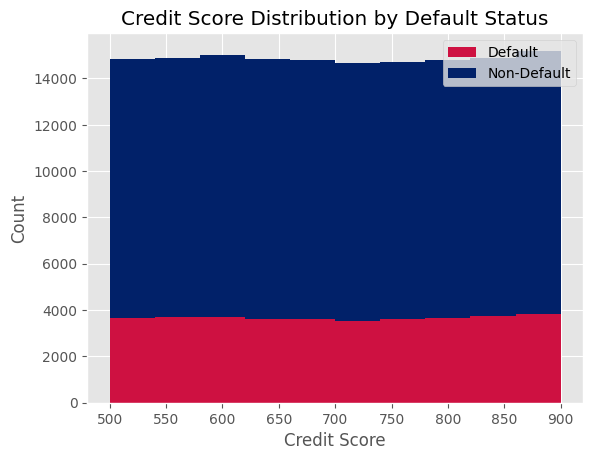

In [46]:
plt.hist([df[df['Status'] == 1]['Credit_Score'], df[df['Status'] == 0]['Credit_Score']],
         color=['#CE1141', '#012169'],
         alpha=1,
         label=['Default', 'Non-Default'],
         stacked=True)

plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution by Default Status')
plt.legend()
plt.savefig("credit_score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

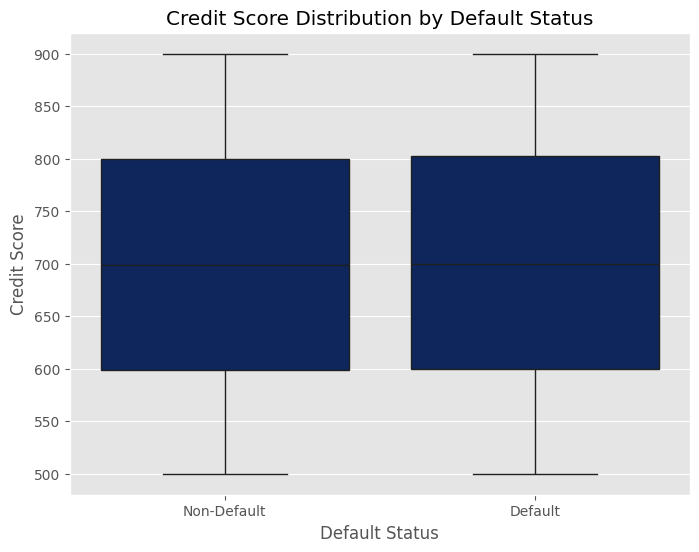

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Credit_Score', data=df, color = '#012169')
plt.xlabel('Default Status')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Default Status')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.savefig("credit_score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Key insights: There is no significant difference in the proportion of defaulters and non-defaulters across credit score intervals. This shows that credit score alone may not be a strong predictor of loan default in this dataset.

## Gender and Default Status

Relationship between income and the default status:

Hypothesis: Gender may have a relationship with loan default rates, with certain genders potentially exhibiting higher default risks.

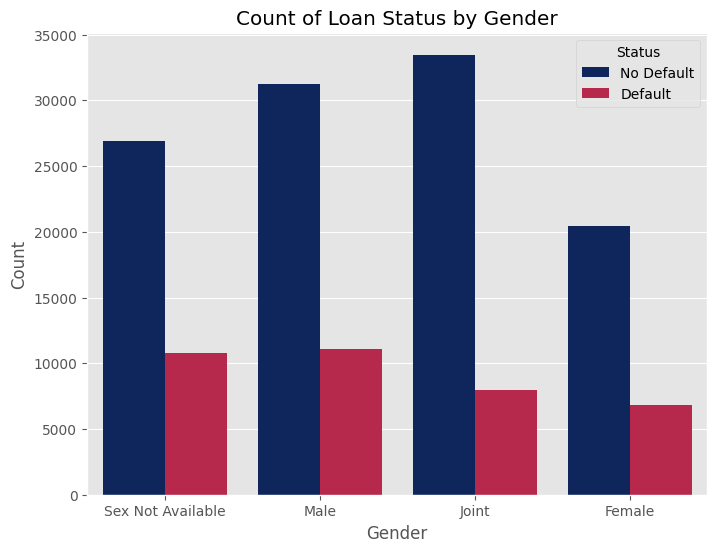

In [48]:
custom_palette = ['#012169', '#CE1141']

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Status', data=df, palette=custom_palette)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Loan Status by Gender')
plt.legend(title='Status', labels=['No Default', 'Default'])
plt.savefig("loan_gender.png", dpi=300, bbox_inches='tight')
plt.show()

Calculating proportions

In [49]:
default_male = len(df[(df['Gender'] == 'Male') & (df['Status'] == 1)])
total_male = len(df[df['Gender'] == 'Male'])

default_female = len(df[(df['Gender'] == 'Female') & (df['Status'] == 1)])
total_female = len(df[df['Gender'] == 'Female'])

default_joint = len(df[(df['Gender'] == 'Joint') & (df['Status'] == 1)])
total_joint = len(df[df['Gender'] == 'Joint'])

default_rate_male = default_male / total_male
default_rate_female = default_female / total_female
default_rate_joint = default_joint / total_joint

print(default_rate_male)
print(default_rate_female)
print(default_rate_joint)

0.2619137580881311
0.25115528497029266
0.19162298606246528


Key Takeaway: Joint loans have the lowest default rate. Default rate for joint loans is 19.16%, significantly lower than for male-only of 26.19% and female-only of 25.12% borrowers.

## Correlation Heatmap

To see a visual representation of the relationships between numerical variables in the dataset, we are creating a correlation heatmap.

In [51]:
cat_cols = [col for col in df.columns if df[col].dtype in ['object', 'category']]
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Removing 'Status' and unwanted variables
num_cols.remove('Status')
num_cols.remove('ID')
num_cols.remove('year')

num_cols_with_target = num_cols.copy()
num_cols_with_target.append('Status')

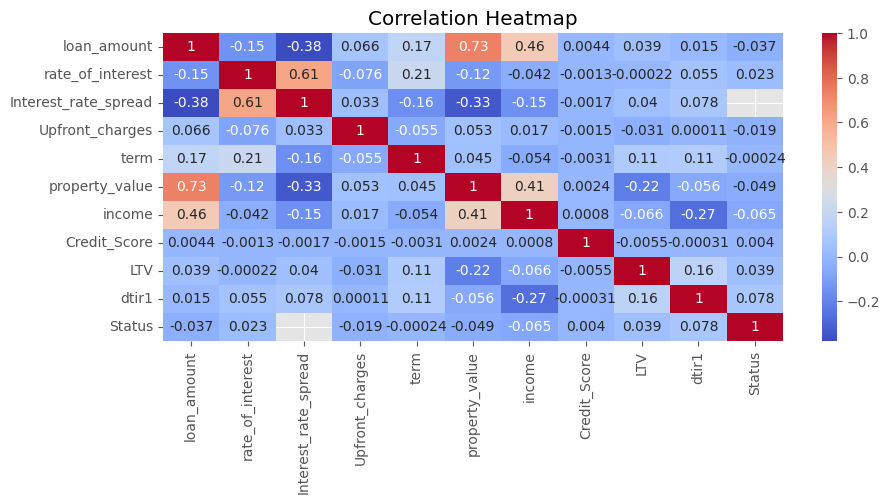

In [52]:
correlation_matrix = df[num_cols_with_target].corr()

# Visualizing correlation heatmap
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows the relationships between various features and the target variable status. Notable observations include a strong positive correlation between loan_amount and property_value (0.73), suggesting larger loans are associated with higher property values.

## Loan Amount vs Property Value

To verify the strong positive correlation of 0.73 between loan amount and property value, I visualized the relationship in the scatter plot to see what the data is actually telling.

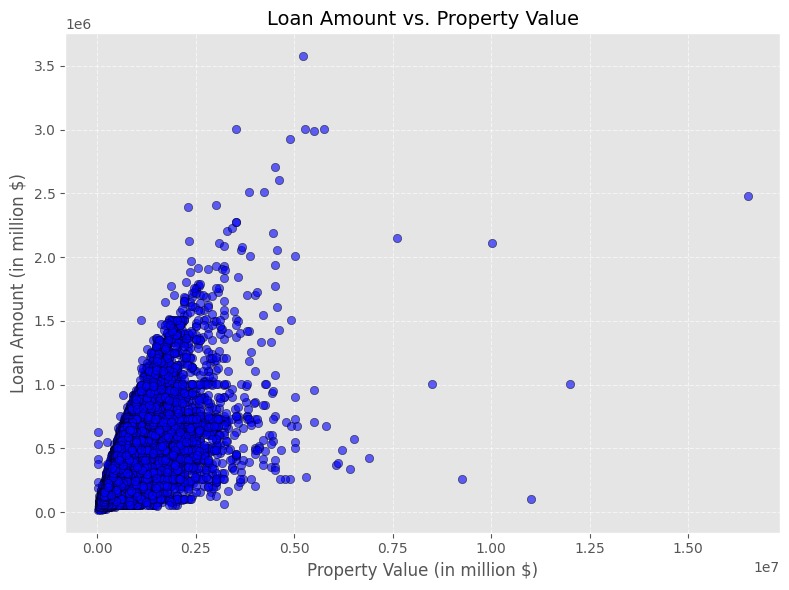

In [66]:
loan_amount = df['loan_amount']
property_value = df['property_value']

plt.figure(figsize=(8, 6))
plt.scatter(property_value, loan_amount, alpha=0.6, c='blue', edgecolors='k')
plt.title('Loan Amount vs. Property Value', fontsize=14)
plt.xlabel('Property Value (in million $)', fontsize=12)
plt.ylabel('Loan Amount (in million $)', fontsize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Takeaway: The scatter plot shows that the relationship is generally positive but not perfectly linear. Therefore, financial institutions should further explore other factors to better understand the patterns.

# Building the Model

## Decision Tree Classifier

Decision tress can model nonlinear relationships between features and provide a clear visual representation. It is easy to interpret and enables the credit risk department to identify key drivers of loan defaults and focus on actionable factors to reduce risk.

In [30]:
# Remove columns with null values
df = df.loc[:, df.isnull().sum() == 0]

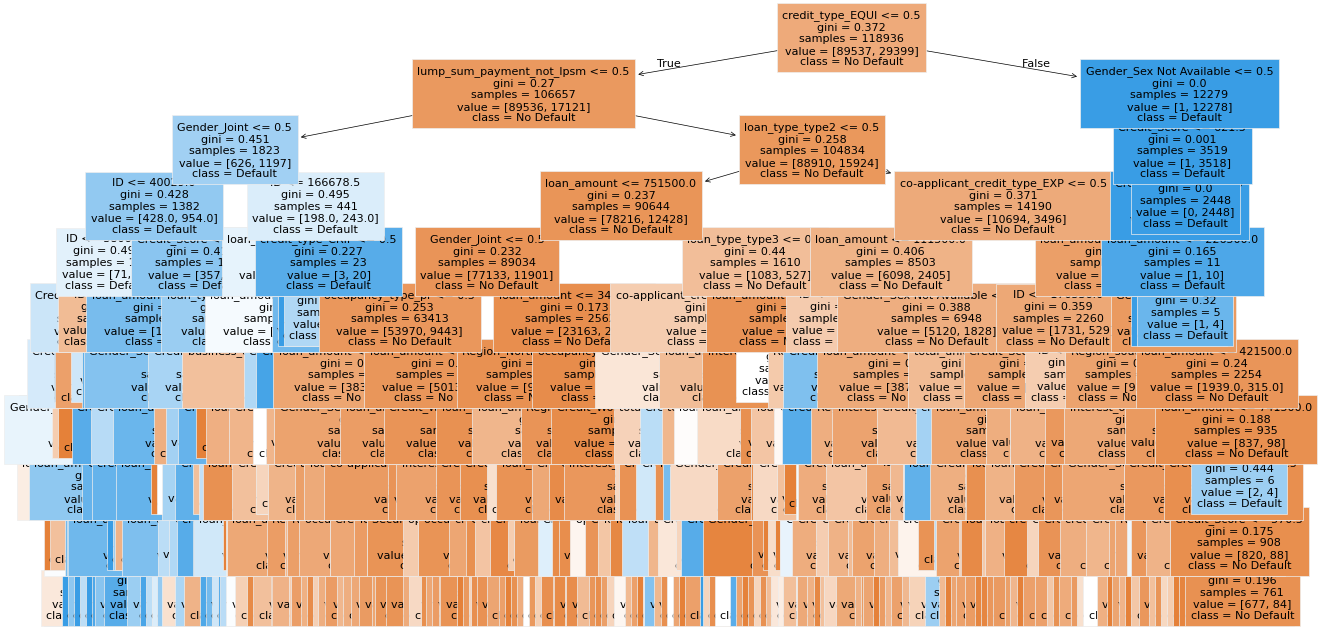

In [31]:
X = df.drop(['Status'], axis=1)
y = df['Status']
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Visualize the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True, fontsize=8)
plt.show()

Key Insights:

*   Joint applications (Gender_joint <= 0.5) significantly reduce the likelihood of default. As we've seen from the exploratory analysis, shared repayment responsibilities or combined incomes indicate strong financial stability.

*   Loans with amounts <= $751,500 are more likely classified as no default, while higher loan amounts increase the likelihood of default. This follows the finance principle that usually the higher the amount, higher the risk involved.

*   Certain credit types (credit_type_EQUI <= 0.5) are strongly associated with no default. This needs further research as profiles related to Equifax credit are showing significant impact on the dataset.



## Evaluation

        Predicted 0  Predicted 1
True 0        22273          221
True 1         3920         3320

Recall: 45.86%
Precision: 93.76%

Accuracy: 86.07%


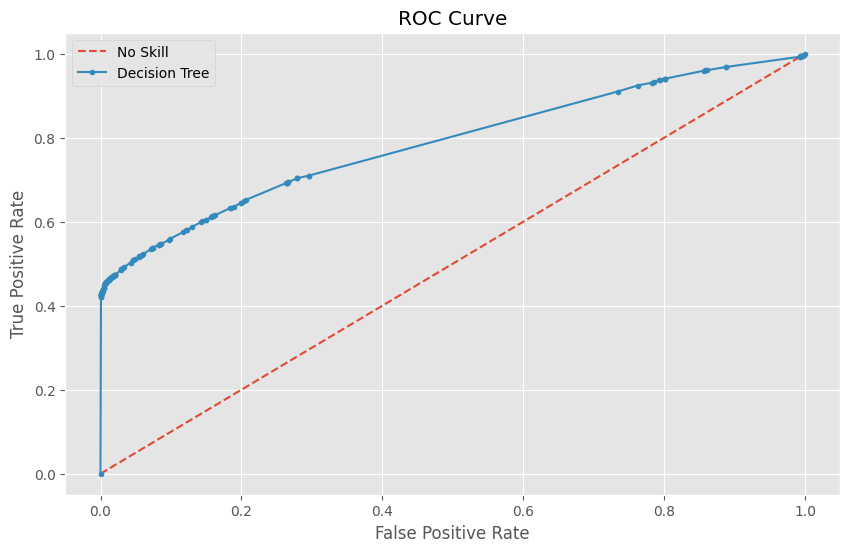


ROC AUC Score: 0.7861415254012486


In [60]:
# Confusion Matrix, Precision, Recall
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1"], index=["True 0", "True 1"])

recall = cm[1, 1] / cm[1].sum()  # True Positives / Actual Positives
precision = cm[1, 1] / cm[:, 1].sum()  # True Positives / Predicted Positives

print(cm_df)
print("\nRecall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, y_prob)
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("\nROC AUC Score:", roc_auc)



Confusion Matrix:

True Negatives: 22,273 (Predicted as non-default correctly)

False Positives: 221 (Predicted as default but were actually non-default)

False Negatives: 3,920 (Predicted as non-default but were actually default)

True Positives: 3,320 (Predicted as default correctly)

The model is very precise (93.76%) in identifying defaulters, this means that the predicted defaulters are highly reliable. However, the model fails to identify less than half of the actual defaulters (45.86%).

This prioritizes minimizing false alarms but leaves room for improving the model to better mitigate the risk. Overall accuracy of 86.07%, and the ROC AUC score of 0.786 indicates this model is moderately good at distinguishing defaulters from non-defaulters.

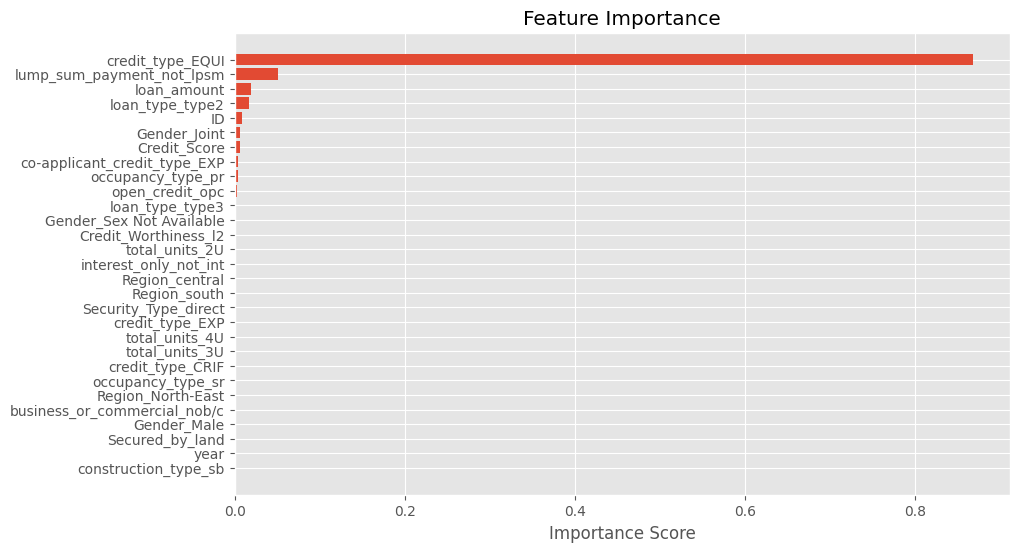

In [33]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

Insights:

*   As mentioned earlier, EQUI credit type plays a critical role here, needs further research.

*   The second most important feature is lump sum payment, showing that borrowers who have not made lump sum payments may indicate better financial management and less risk.

*   Loan amount and loan type have a smaller but relevant impact on predicting results.


# Conclusion

This project tackled the challenge of predicting loan defaults by combining exploratory data analysis with a Decision Tree model. Key insights, such as the importance of credit behavior and lump sum payment patters, highlight critical factors influencing default risk. The model delivers high precision, enabling confident identification of high-risk borrowers, with opportunities to improve recall for capturing more defaulters. By refining the model and focusing on these key predictors, the bank can enhance risk management, reduce loan losses, and make more informed lending decisions.